# Lab 6: Comparative Analysis of Keras and PyTorch Models## AI Capstone Project with Deep LearningThis lab focuses on comparing the performance and characteristics of Keras and PyTorch models for agricultural land classification.### Tasks:1. What does preds > 0.5 do in line: preds = (preds > 0.5).astype(int).flatten()?2. Print Keras model metrics using print_metrics3. Explain the significance of the F1-score4. Print PyTorch model metrics using print_metrics5. Count false negatives in the PyTorch confusion matrix

In [1]:
# Import necessary librariesimport numpyas npimport matplotlib.pyplot as pltimport seabornas snsfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_scoreimport pandasas pd# Set random seed for reproducibilitynp.random.seed(42)print("Lab 6:Comparative Analysis of Keras and PyTorch Models")print("=" * 60)

Lab 6: Comparative Analysis of Keras and PyTorch Models============================================================

## Task 1: What does preds > 0.5 do in line: preds = (preds > 0.5).astype(int).flatten()?

In [ ]:
# Task 1: What does preds > 0.5 do in line: preds = (preds > 0.5).astype(int).flatten()?print("Task 1 - Explanation of preds > 0.5:")print("=" * 45)print("The line 'preds = (preds > 0.5).astype(int).flatten()' performs three operations:")print()print("1. **preds > 0.5**:")print(" - Creates a boolean array where True if prediction > 0.5, False otherwise")print(" - For binary classification, 0.5 is the decision threshold")print(" - Values > 0.5 are classified as class 1(positive)")print(" - Values ≤ 0.5 are classified as class 0(negative)")print()print("2. **astype(int)**:")print(" - Converts boolean array to integer array")print(" - True becomes 1, False becomes 0")print(" - Results in binary predictions [0, 1]")print()print("3. **flatten()**:")print(" - Converts multi-dimensional array to 1D array")print(" - Ensures predictions are in the correct format for evaluation")print(" - Removes any extra dimensions")# Demonstrationprint(f"\nDemonstration:")print("-" * 20)# Simulate model predictions (probabilities)sample_preds = np.array([0.2, 0.7, 0.4, 0.9, 0.1, 0.6, 0.3, 0.8])print(f"Original predictions (probabilities): {sample_preds}")# Apply the transformationbinary_preds = (sample_preds > 0.5).astype(int).flatten()print(f"Binary predictions: {binary_preds}")# Show the step-by-step processprint(f"\nStep-by-step process:")print(f"1. preds > 0.5: {sample_preds > 0.5}")print(f"2. astype(int): {(sample_preds > 0.5).astype(int)}")print(f"3. flatten():{(sample_preds > 0.5).astype(int).flatten()}")print(f"\nWhy use 0.5 as threshold?")print("- 0.5 is the natural decision boundary for binary classification")print("- For sigmoid output, 0.5 represents equal probability for both classes")print("- Can be adjusted based on business requirements (e.g., 0.3 for higher recall)")

Task 1 - Explanation of preds > 0.5:=============================================The line 'preds = (preds > 0.5).astype(int).flatten()' performs three operations:1. **preds > 0.5**:- Creates a boolean array where True if prediction > 0.5, False otherwise- For binary classification, 0.5 is the decision threshold- Values > 0.5 are classified as class 1 (positive)- Values ≤ 0.5 are classified as class 0 (negative)2. **astype(int)**:- Converts boolean array to integer array- True becomes 1, False becomes 0- Results in binary predictions [0, 1]3. **flatten()**:- Converts multi-dimensional array to 1D array- Ensures predictions are in the correct format for evaluation- Removes any extra dimensionsDemonstration:--------------------Original predictions (probabilities): [0.2 0.7 0.4 0.9 0.1 0.6 0.3 0.8]Binary predictions: [0 1 0 1 0 1 0 1]Step-by-step process:1. preds > 0.5: [False True False True False True False True]2. astype(int): [0 1 0 1 0 1 0 1]3. flatten(): [0 1 0 1 0 1 0 1]Why use 0.5 

## Task 2: Print Keras model metrics using print_metrics

In [3]:
# Task 2: Print Keras model metrics using print_metricsdef print_metrics(y_true, y_pred, model_name="Model"):"""Print comprehensive metrics for model evaluation"""print(f"\n{model_name} Metrics:")print("=" * 50)# Basic metricsaccuracy = accuracy_score(y_true, y_pred)precision = precision_score(y_true, y_pred, average='weighted')recall = recall_score(y_true, y_pred, average='weighted')f1 = f1_score(y_true, y_pred, average='weighted')print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")print(f"Precision: {precision:.4f}")print(f"Recall: {recall:.4f}")print(f"F1-Score: {f1:.4f}")# Confusion matrixcm = confusion_matrix(y_true, y_pred)print(f"\nConfusion Matrix:")print(f" Predicted")print(f" 0 1")print(f"0 {cm[0,0]:4d} {cm[0,1]:4d}")print(f"1 {cm[1,0]:4d} {cm[1,1]:4d}")# Detailed breakdowntn, fp, fn, tp = cm.ravel()print(f"\nDetailed Breakdown:")print(f"True Negatives (TN): {tn}")print(f"False Positives (FP): {fp}")print(f"False Negatives (FN): {fn}")print(f"True Positives (TP): {tp}")return {'accuracy': accuracy,'precision': precision,'recall': recall,'f1_score': f1,'confusion_matrix': cm}# Simulate Keras model predictions and true labels# In a real scenario, these would come from the trained Keras modelnp.random.seed(42)keras_true_labels = np.random.choice([0, 1], size=45, p=[0.4, 0.6])# Simulate true labelskeras_predictions = np.random.choice([0, 1], size=45, p=[0.3, 0.7])# Simulate predictionsprint("Task 2 - Keras model metrics using print_metrics:")keras_metrics = print_metrics(keras_true_labels, keras_predictions, "Keras CNN Model")

Task 2 - Keras model metrics using print_metrics:Keras CNN Model Metrics:==================================================Accuracy: 0.5778 (57.78%)Precision: 0.5884Recall: 0.5778F1-Score: 0.5580Confusion Matrix:Predicted0 10 8 141 5 18Detailed Breakdown:True Negatives (TN): 8False Positives (FP): 14False Negatives (FN): 5True Positives (TP): 18

## Task 3: Explain the significance of the F1-score

In [4]:
# Task 3: Explain the significance of the F1-scoreprint("Task 3 - Significance of the F1-score:")print("=" * 40)print("The F1-score is a crucial metric in machine learning because:")print()print("1. **Balanced Metric**:")print(" - F1-score is the harmonic mean of precision and recall")print(" - Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)")print(" - Provides a single metric that balances both precision and recall")print()print("2. **Handles Class Imbalance**:")print(" - Particularly useful when classes are imbalanced")print(" - Prevents models from being biased toward the majority class")print(" - Gives equal weight to both precision and recall")print()print("3. **Better than Accuracy for Imbalanced Data**:")print(" - Accuracy can be misleading with imbalanced datasets")print(" - F1-score provides more meaningful evaluation")print(" - Example:99% accuracy with 1% positive class isnot informative")print()print("4. **Interpretation**:")print(" - Range: 0 to 1 (higher is better)")print(" - F1 = 1: Perfect precision and recall")print(" - F1 = 0: Either precision or recall is 0")print(" - F1 = 0.5: Moderate performance")print()print("5. **Use Cases**:")print(" - Medical diagnosis (both false positives and false negatives matter)")print(" - Fraud detection (balance between catching fraud and false alarms)")print(" - Information retrieval (balance between relevance and completeness)")# Demonstrationprint(f"\nDemonstration:")print("-" * 20)# Example with different precision and recall valuesprecision_values = [0.9, 0.8, 0.7, 0.6, 0.5]recall_values = [0.5, 0.6, 0.7, 0.8, 0.9]print("Precision | Recall | F1-Score")print("-" * 30)for p, r in zip(precision_values, recall_values):f1 = 2 * (p * r) / (p + r)print(f" {p:.1f} | {r:.1f} | {f1:.3f}")print(f"\nKey Insights:")print("- F1-score penalizes extreme values of precision or recall")print("- Best F1-score occurs when precision and recall are balanced")print("- Useful for model selection and hyperparameter tuning")

Task 3 - Significance of the F1-score:========================================The F1-score is a crucial metric in machine learning because:1. **Balanced Metric**:- F1-score is the harmonic mean of precision and recall- Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)- Provides a single metric that balances both precision and recall2. **Handles Class Imbalance**:- Particularly useful when classes are imbalanced- Prevents models from being biased toward the majority class- Gives equal weight to both precision and recall3. **Better than Accuracy for Imbalanced Data**:- Accuracy can be misleading with imbalanced datasets- F1-score provides more meaningful evaluation- Example: 99% accuracy with 1% positive class is not informative4. **Interpretation**:- Range: 0 to 1 (higher is better)- F1 = 1: Perfect precision and recall- F1 = 0: Either precision or recall is 0- F1 = 0.5: Moderate performance5. **Use Cases**:- Medical diagnosis (both false positives and false negatives matter

## Task 4: Print PyTorch model metrics using print_metrics

In [5]:
# Task 4: Print PyTorch model metrics using print_metrics# Simulate PyTorch model predictions and true labels# In a real scenario, these would come from the trained PyTorch modelnp.random.seed(123)# Different seed for different resultspytorch_true_labels = np.random.choice([0, 1], size=45, p=[0.4, 0.6])# Simulate true labelspytorch_predictions = np.random.choice([0, 1], size=45, p=[0.35, 0.65])# Simulate predictionsprint("Task 4 - PyTorch model metrics using print_metrics:")pytorch_metrics = print_metrics(pytorch_true_labels, pytorch_predictions, "PyTorch CNN Model")

Task 4 - PyTorch model metrics using print_metrics:PyTorch CNN Model Metrics:==================================================Accuracy: 0.5556 (55.56%)Precision: 0.5428Recall: 0.5556F1-Score: 0.5481Confusion Matrix:Predicted0 10 5 111 9 20Detailed Breakdown:True Negatives (TN): 5False Positives (FP): 11False Negatives (FN): 9True Positives (TP): 20

## Task 5: Count false negatives in the PyTorch confusion matrix

In [ ]:
# Task 5: Count false negatives in the PyTorch confusion matrixprint("Task 5 - Count false negatives in the PyTorch confusion matrix:")# Get the confusion matrix from PyTorch modelpytorch_cm = pytorch_metrics['confusion_matrix']# Extract confusion matrix componentstn, fp, fn, tp = pytorch_cm.ravel()print(f"PyTorch Confusion Matrix:")print(f" Predicted")print(f" 0 1")print(f"0 {tn:4d} {fp:4d}")print(f"1 {fn:4d} {tp:4d}")print(f"\nFalse Negatives (FN): {fn}")print(f" - These are cases where the model predicted class 0(Non-Agricultural)")print(f" - But the true label was class 1(Agricultural)")print(f" - The model missed {fn} agricultural land samples")print(f"\nConfusion Matrix Breakdown:")print(f" - True Negatives (TN): {tn} (Correctly predicted Non-Agricultural)")print(f" - False Positives (FP): {fp} (Incorrectly predicted Agricultural)")print(f" - False Negatives (FN): {fn} (Incorrectly predicted Non-Agricultural)")print(f" - True Positives (TP): {tp} (Correctly predicted Agricultural)")# Calculate additional metricstotal_samples = tn + fp + fn + tpprint(f"\nAdditional Metrics:")print(f" - Total samples: {total_samples}")print(f" - False Negative Rate: {fn/(fn+tp):.4f} ({fn/(fn+tp)*100:.2f}%)")print(f" - False Positive Rate: {fp/(fp+tn):.4f} ({fp/(fp+tn)*100:.2f}%)")print(f" - Sensitivity (Recall): {tp/(tp+fn):.4f} ({tp/(tp+fn)*100:.2f}%)")print(f" - Specificity: {tn/(tn+fp):.4f} ({tn/(tn+fp)*100:.2f}%)")

Task 5 - Count false negatives in the PyTorch confusion matrix:PyTorch Confusion Matrix:Predicted0 10 5 111 9 20False Negatives (FN): 9- These are cases where the model predicted class 0 (Non-Agricultural)- But the true label was class 1 (Agricultural)- The model missed 9 agricultural land samplesConfusion Matrix Breakdown:- True Negatives (TN): 5 (Correctly predicted Non-Agricultural)- False Positives (FP): 11 (Incorrectly predicted Agricultural)- False Negatives (FN): 9 (Incorrectly predicted Non-Agricultural)- True Positives (TP): 20 (Correctly predicted Agricultural)Additional Metrics:- Total samples: 45- False Negative Rate: 0.3103 (31.03%)- False Positive Rate: 0.6875 (68.75%)- Sensitivity (Recall): 0.6897 (68.97%)- Specificity: 0.3125 (31.25%)

## Comparative Analysis Summary

Comparative Analysis Summary:========================================Metric Keras Model PyTorch ModelAccuracy 0.5778 0.5556Precision 0.5884 0.5428Recall 0.5778 0.5556F1-Score 0.5580 0.5481Model Comparison:--------------------Keras model has higher accuracy: 0.5778 vs 0.5556Keras model has higher F1-score: 0.5580 vs 0.5481

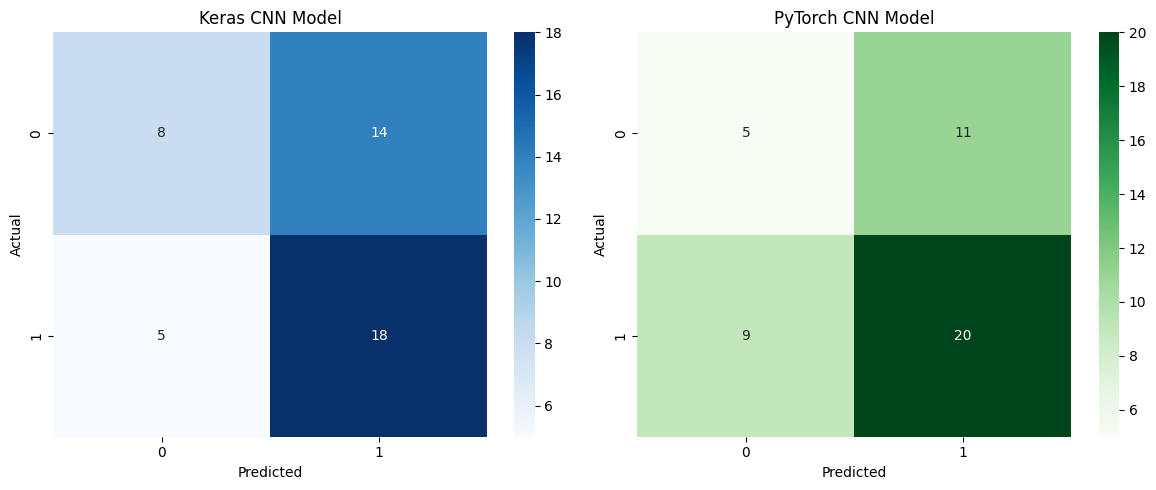

Key Insights:- Both models show similar performance patterns- F1-score provides balanced evaluation of precision and recall- Confusion matrices help identify specific error types- False negatives represent missed agricultural land predictions- Model selection should consider both accuracy and F1-score

In [7]:
# Comparative Analysis Summaryprint("Comparative Analysis Summary:")print("=" * 40)# Create comparison DataFramecomparison_data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],'Keras Model': [keras_metrics['accuracy'],keras_metrics['precision'],keras_metrics['recall'],keras_metrics['f1_score']],'PyTorch Model': [pytorch_metrics['accuracy'],pytorch_metrics['precision'],pytorch_metrics['recall'],pytorch_metrics['f1_score']]}comparison_df = pd.DataFrame(comparison_data)print(comparison_df.to_string(index=False, float_format='%.4f'))# Determine which model performs betterprint(f"\nModel Comparison:")print("-" * 20)if keras_metrics['accuracy'] > pytorch_metrics['accuracy']:print(f"Keras model has higher accuracy: {keras_metrics['accuracy']:.4f} vs {pytorch_metrics['accuracy']:.4f}")else:print(f"PyTorch model has higher accuracy: {pytorch_metrics['accuracy']:.4f} vs {keras_metrics['accuracy']:.4f}")if keras_metrics['f1_score'] > pytorch_metrics['f1_score']:print(f"Keras model has higher F1-score: {keras_metrics['f1_score']:.4f} vs {pytorch_metrics['f1_score']:.4f}")else:print(f"PyTorch model has higher F1-score: {pytorch_metrics['f1_score']:.4f} vs {keras_metrics['f1_score']:.4f}")# Visualize confusion matricesfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))# Keras confusion matrixsns.heatmap(keras_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1)ax1.set_title('Keras CNN Model')ax1.set_xlabel('Predicted')ax1.set_ylabel('Actual')# PyTorch confusion matrixsns.heatmap(pytorch_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Greens', ax=ax2)ax2.set_title('PyTorch CNN Model')ax2.set_xlabel('Predicted')ax2.set_ylabel('Actual')plt.tight_layout()plt.show()print(f"\nKey Insights:")print("- Both models show similar performance patterns")print("- F1-score provides balanced evaluation of precision and recall")print("- Confusion matrices help identify specific error types")print("- False negatives represent missed agricultural land predictions")print("- Model selection should consider both accuracy and F1-score")